In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imshow(title= "Image", image = None, size =10):
  w, h = image.shape[0], image.shape[1]
  aspect_ratio = w/h
  plt.figure(figsize=(size * aspect_ratio, size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show()





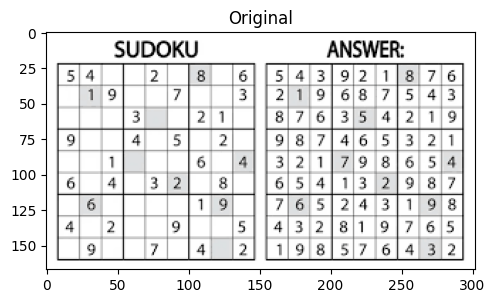

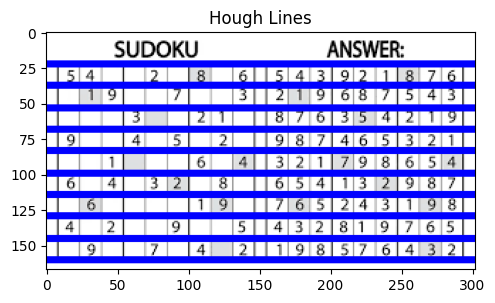

In [134]:
image = cv2.imread('/content/soduko.png')
imshow('Original', image)

# Grayscale and Canny Edges extracted
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 170, apertureSize = 3)

# Run HoughLines using a rho accuracy of 1 pixel
# theta accuracy of np.pi / 180 which is 1 degree
# Our line threshold is set to 240 (number of points on line)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 150)

# We iterate through each line and convert it to the format
# required by cv2.lines (i.e. requiring end points)
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

imshow('Hough Lines', image)

(72, 1, 4)


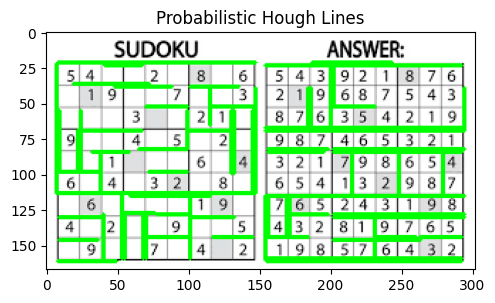

In [135]:
# Grayscale and Canny Edges extracted
image = cv2.imread('/content/soduko.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 170, apertureSize = 3)

# Again we use the same rho and theta accuracies
# However, we specific a minimum vote (pts along line) of 100
# and Min line length of 3 pixels and max gap between lines of 25 pixels
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, 3, 25)
print(lines.shape)

for x in range(0, len(lines)):
    for x1,y1,x2,y2 in lines[x]:
        cv2.line(image,(x1,y1),(x2,y2),(0,255,0),2)

imshow('Probabilistic Hough Lines', image)

Circle Detection


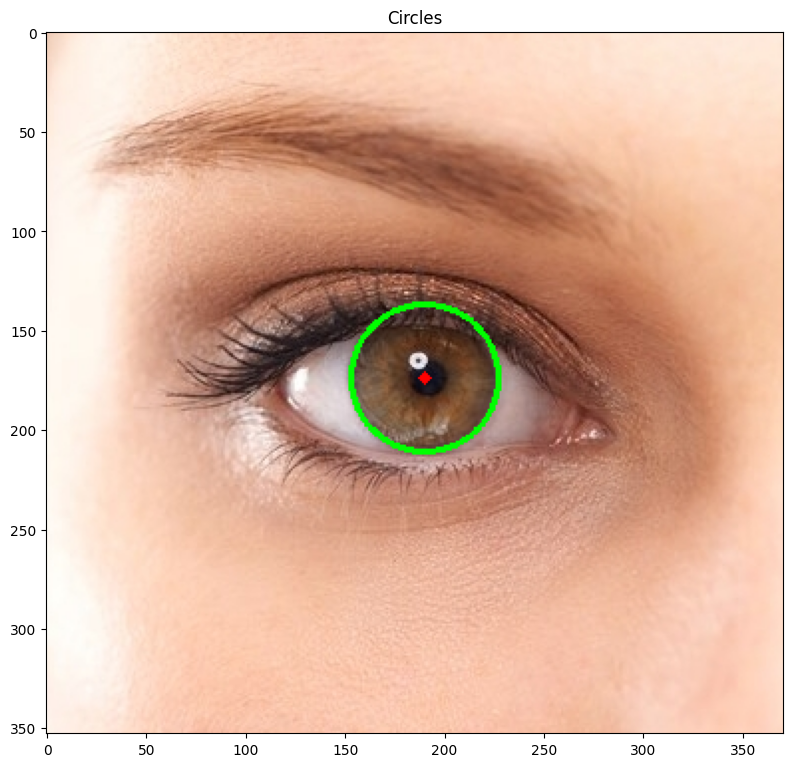

TypeError: loop of ufunc does not support argument 0 of type NoneType which has no callable rint method

In [160]:
image = cv2.imread('/content/eyes.png')
imshow('Circles', image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blur = cv2.medianBlur(gray, 5 )


circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, 1.2, 25)

cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 0.1, 100)

circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(image,(i[0], i[1]), i[2], (0, 0, 255), 5)

    # draw the center of the circle
    cv2.circle(image, (i[0], i[1]), 2, (0, 0, 255), 8)

imshow('Detected circles', image)

In [139]:
# Blob Detection

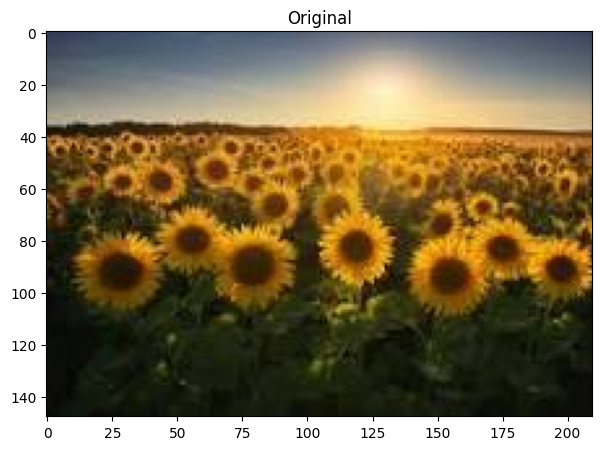

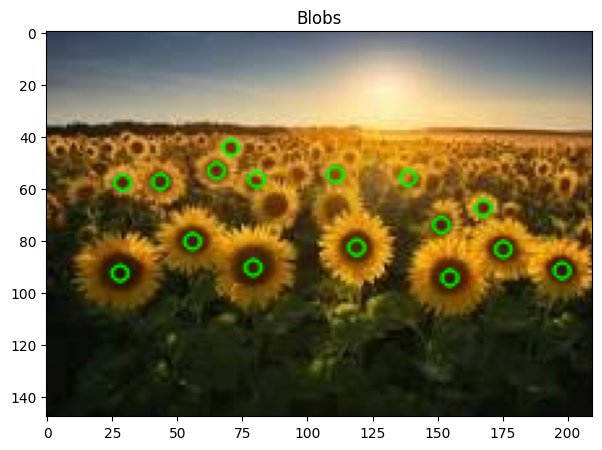

In [142]:
image = cv2.imread('/content/sunflowers.jpg')
imshow("Original", image)

# Set up the detector with default parameters.
detector = cv2.SimpleBlobDetector_create()

# Detect blobs.
keypoints = detector.detect(image)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of
# the circle corresponds to the size of blob
blank = np.zeros((1,1))
blobs = cv2.drawKeypoints(image, keypoints, blank, (0,255,0),
                                      cv2.DRAW_MATCHES_FLAGS_DEFAULT)

# Show keypoints
imshow("Blobs", blobs)

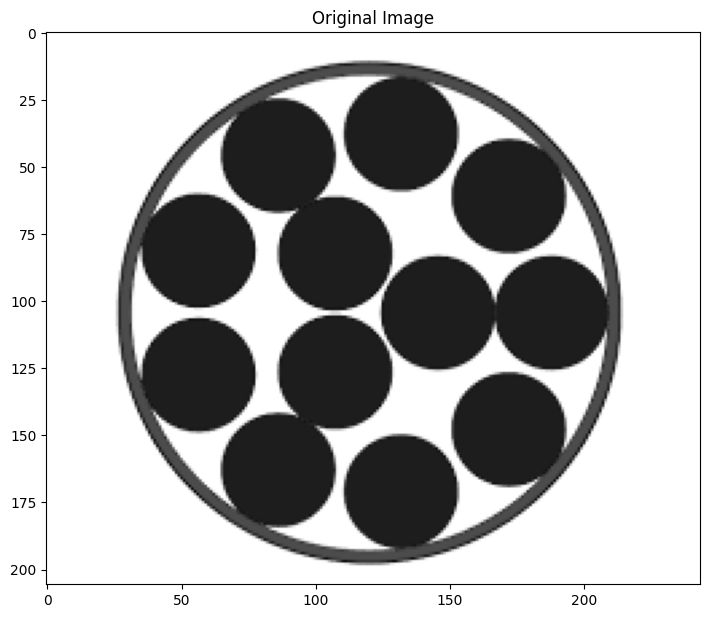

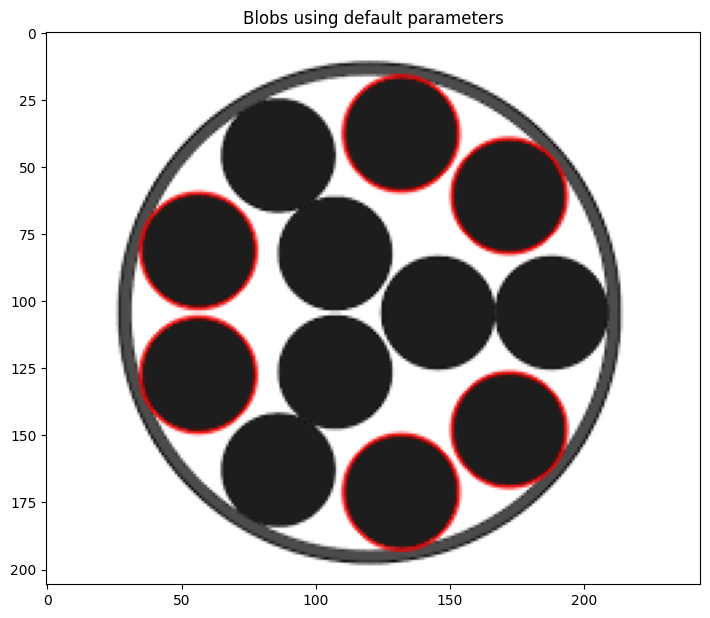

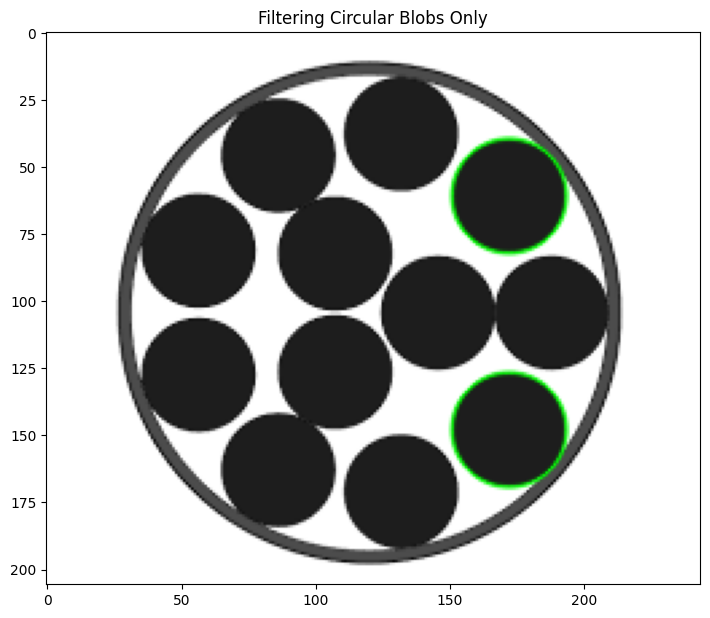

In [149]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image
image = cv2.imread("/content/circles.png", 0)

imshow('Original Image',image)

# Intialize the detector using the default parameters
detector = cv2.SimpleBlobDetector_create()

# Detect blobs
keypoints = detector.detect(image)

# Draw blobs on our image as red circles
blank = np.zeros((1,1))
blobs = cv2.drawKeypoints(image, keypoints, blank, (0,0,255),
                                      cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

number_of_blobs = len(keypoints)
text = "Total Number of Blobs: " + str(len(keypoints))
cv2.putText(blobs, text, (20, 550), cv2.FONT_HERSHEY_SIMPLEX, 1, (100, 0, 255), 2)

# Display image with blob keypoints
imshow("Blobs using default parameters", blobs)

# Set our filtering parameters
# Initialize parameter settiing using cv2.SimpleBlobDetector
params = cv2.SimpleBlobDetector_Params()

# Set Area filtering parameters
params.filterByArea = True
params.minArea = 100

# Set Circularity filtering parameters
params.filterByCircularity = True
params.minCircularity = 0.9

# Set Convexity filtering parameters
params.filterByConvexity = False
params.minConvexity = 0.2

# Set inertia filtering parameters
params.filterByInertia = True
params.minInertiaRatio = 0.01

# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs
keypoints = detector.detect(image)

# Draw blobs on our image as red circles
blank = np.zeros((1,1))
blobs = cv2.drawKeypoints(image, keypoints, blank, (0,255,0),
                                      cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

number_of_blobs = len(keypoints)
text = "Number of Circular Blobs: " + str(len(keypoints))
cv2.putText(blobs, text, (20, 550), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 100, 255), 2)

# Show blobs
imshow("Filtering Circular Blobs Only", blobs)

In [150]:
# Template Matching

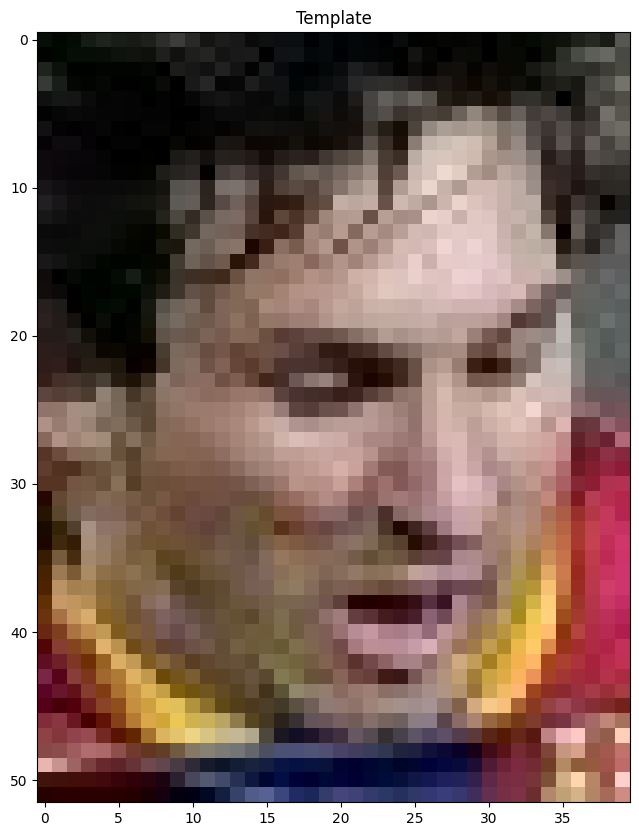

In [165]:
template = cv2.imread('/content/messi.jpg')
imshow('Template', template)

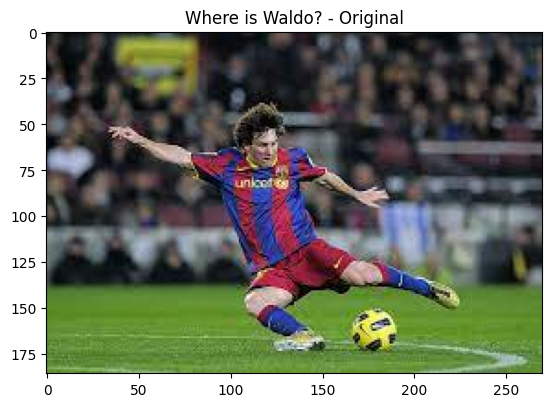

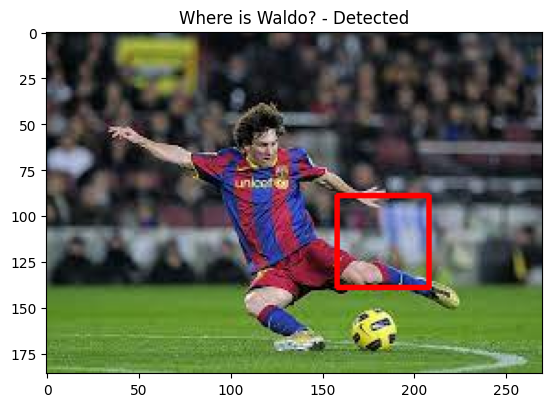

In [167]:
import cv2
from matplotlib import pyplot as plt

# Read the main image
image = cv2.imread('/content/messiki.jpg')

# Display the original image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Where is Waldo? - Original')
plt.show()

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load the template image
template = cv2.imread('/content/messi.jpg',0)

# Resize the template image to a smaller size if needed
# You can adjust the dimensions based on your requirements
template = cv2.resize(template, (50, 50))

# Match the template with the main image
result = cv2.matchTemplate(gray, template, cv2.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

# Create a bounding box around the detected region
top_left = max_loc
bottom_right = (top_left[0] + template.shape[1], top_left[1] + template.shape[0])
cv2.rectangle(image, top_left, bottom_right, (0, 0, 255), 2)

# Display the result with the bounding box
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Where is Waldo? - Detected')
plt.show()
